### SPI总线

#### SPI总线介绍

**SPI**,是英语Serial Peripheral interface的缩写,顾名思义就是率行外设接口。SPI协议主要作为主控芯片去配置外围芯片的接口协议。SPI接口主要应用在EEPROM,FLASH,实时时钟,AD转换器,还有数字信号处理器和数字信号解码器之间。SPI是一种高速的,全双工,同步,串行,主从结构通信总线,并且在芯片的管脚上只占用四根线,节约了芯片的管脚,同时为PCB的布局上节省空间,提供方便,正是出于这种简单易用的特性,现在越来越多的芯片集成了了这种通信协议。

SPI总线的传输速率需要自定义,没有具体的规定,一般为:400KHZ~10MHZ (AHB: 100MHZ, APB: 50MHZ)

*  主要功能:实现MCU与各种外接设备连接(芯片与芯片之间的连接),以串行的方式进行数据交换(串并转换)。
*  拓扑结构:一个SPI Master可以通过共享数据线的方式可以连接多个SPI Slave(一主多从);
*  接口配置:作为芯片与芯片之间互连的接口,通过配置寄存器实现主持控芯片(SPI Master)对外围芯片(SPI Slave)的配置

#### spi信号列表

| 信号 | 名称                        | 含义                    | 描述                                                                                         |
|------|-----------------------------|-------------------------|----------------------------------------------------------------------------------------------|
| SCK  | Serial Clock、时钟信号线    | Master设备往Slave设备传输时钟信号，同步控制数据交换的时机以及速率  |                                                                                              |
| MOSI | Master Output Slave Input、主设备输出从设备输入数据线 | 在Master上也被称为Tx-Channel，作为数据的出口，用于SPI主设备发送数据                        |
| MISO | Master Input Slave Output、主设备输入从设备输出数据线 | 在Master上也被称为Rx-Channel，作为数据的入口，主要用于SPI从设备接收数据                   |
| SS_n | Slave Select、从机选择线，低电平有效   | Master设备片选Slave设备，使被选中的Slave设备能被Master设备访问                              |

SS_n、SCK、MOSI信号均由主设备产生,MISO信号由从设备产生。在SS_n为低电平的前提下,MOSI和MISO信号才有效放,在每个时钟周期MOSI和MISO传输一位数据。

#### spi工作模式

SPI通讯需要使用4条线:3条总线和1条片选,物理连接如下:

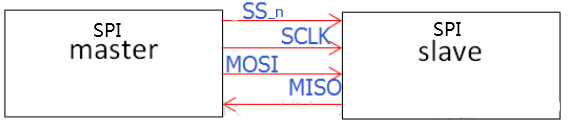

SPI还是遵循主从结构,SPI协议适用于一主多从的工作场景:

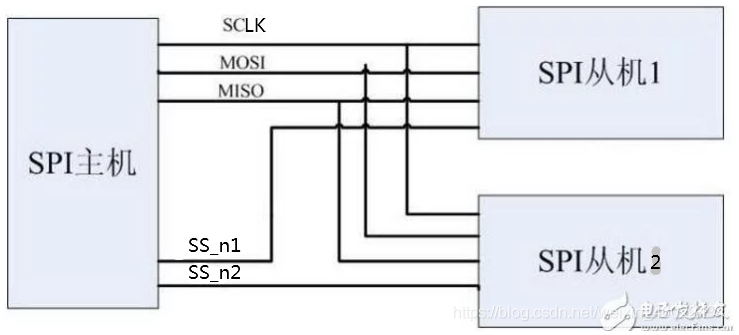

##### spi工作特点

1. 同步方式(Synchronous)传输数据

Master设备会根据将要交换的数据来产生相应的时钟脉冲(Clock Pulse),时钟脉冲组成了时钟信号(Clock Signal),时钟信号通过时钟极性(CPOL)和时钟相位(CPHA)控制着两个SPI设备间何时数居交换以及何时对接收到的数据进行采样,来保证数据在两个设备之间是同步传输的。

2. 主-从结构(Master-Slave)的控制方式

SPI规定了两个SPI设备之间通信必须由主设备(Master)来控制次设备备(Slave)。一个Master设备可以通过提供Clock以及对
Slave设备进行片选(Slave Select)来控制多个Slave设备,SPI协议还规定Slave设备的Clock由Master设备通过SCK管脚提联
给Slave设备,Slave设备本身不能产生或控制Clock。

3. 串行、全双工方式数据交换(DataExchanges)

SPI设备间的数据传输之所以又被称为数据交换(全双工通信),是因为SPI协议规定一个SPI设备不能在数据通信过程中仅仅只充当一个"发送者(Transmitter)"或者"接收者(Receiver)".在每个c1ock周期内,SPI设备都会发送并接收一个bit大小的数据(串行通信)(不管主设备好还是从设备),相当于该设备有一个bit大小的数据被交换了。

需要说明的是,SPI只有主模式和从模式之分,没有读和写的的说法,因为实质上每次SPI是主从设备在交换数据。也就是说,你发一个数据必然会收到一个数据;你要收一个数据必须也要先发一个数据。 

#### spi时序

*  SPI设备在进行通信的过程中,Master设备和Slave设备之间会产生一个数据链路回环(DataLoop)。
*  SPI接口有四种不同的数据传输时序,取决于时钟极性(CPOL)和B时钟相位(CPHA)的组合。

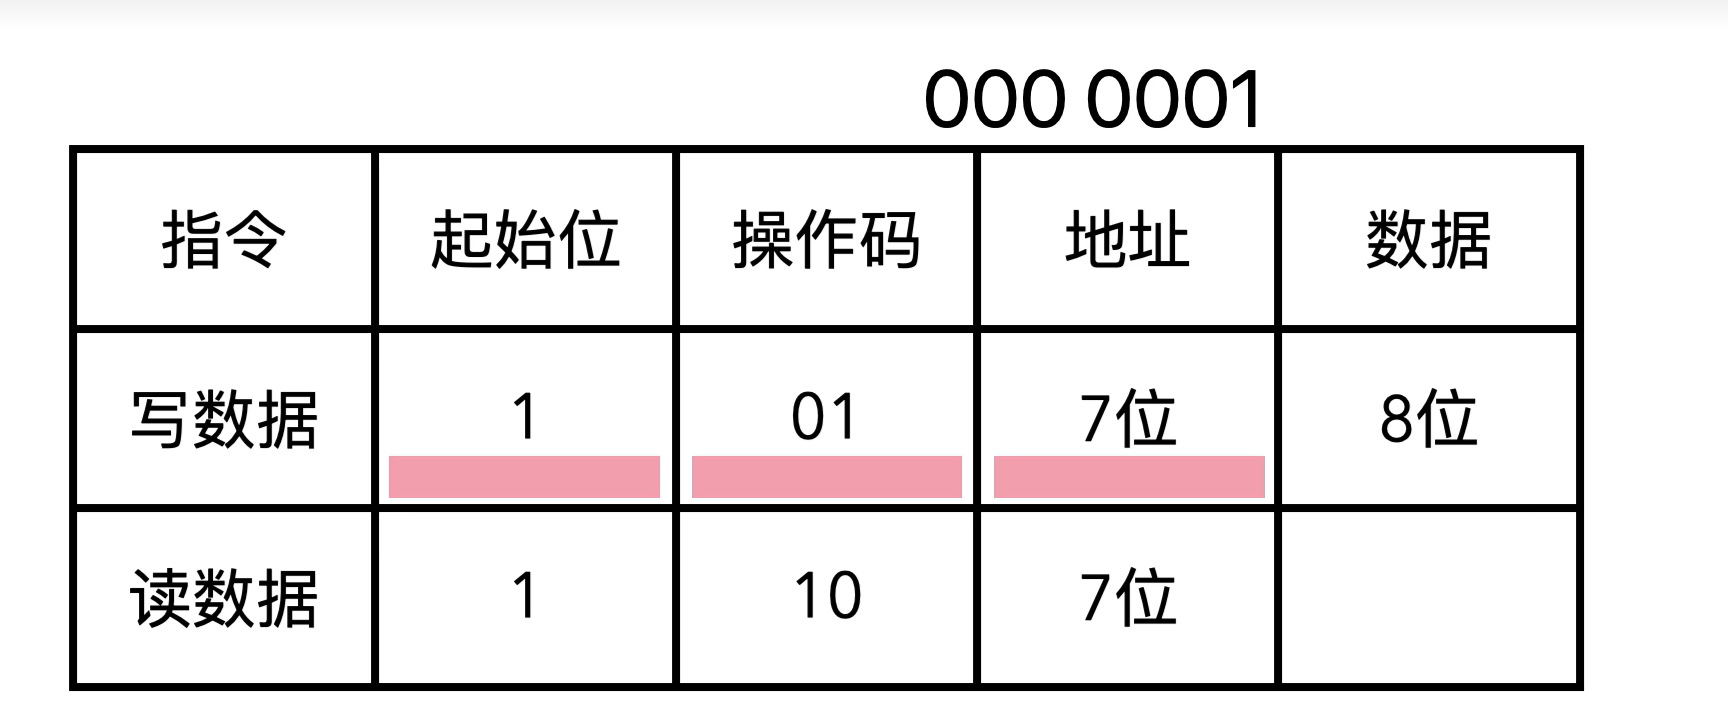

#### 数据采集模式

四种：上升沿、下降沿、高电平、低电平